<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
display(df.head())
print('Пропущенные значения:')
print(df.isna().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропущенные значения:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Разбивай, пожалуйста, код на несколько ячеек, чтобы у тебя после стены кода не шла стена выводов. Так будет более наглядно и проще комментировать твой код
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

In [2]:
pd.set_option('display.max_columns', None)
display(df.head())

# Спасибо буду знать)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


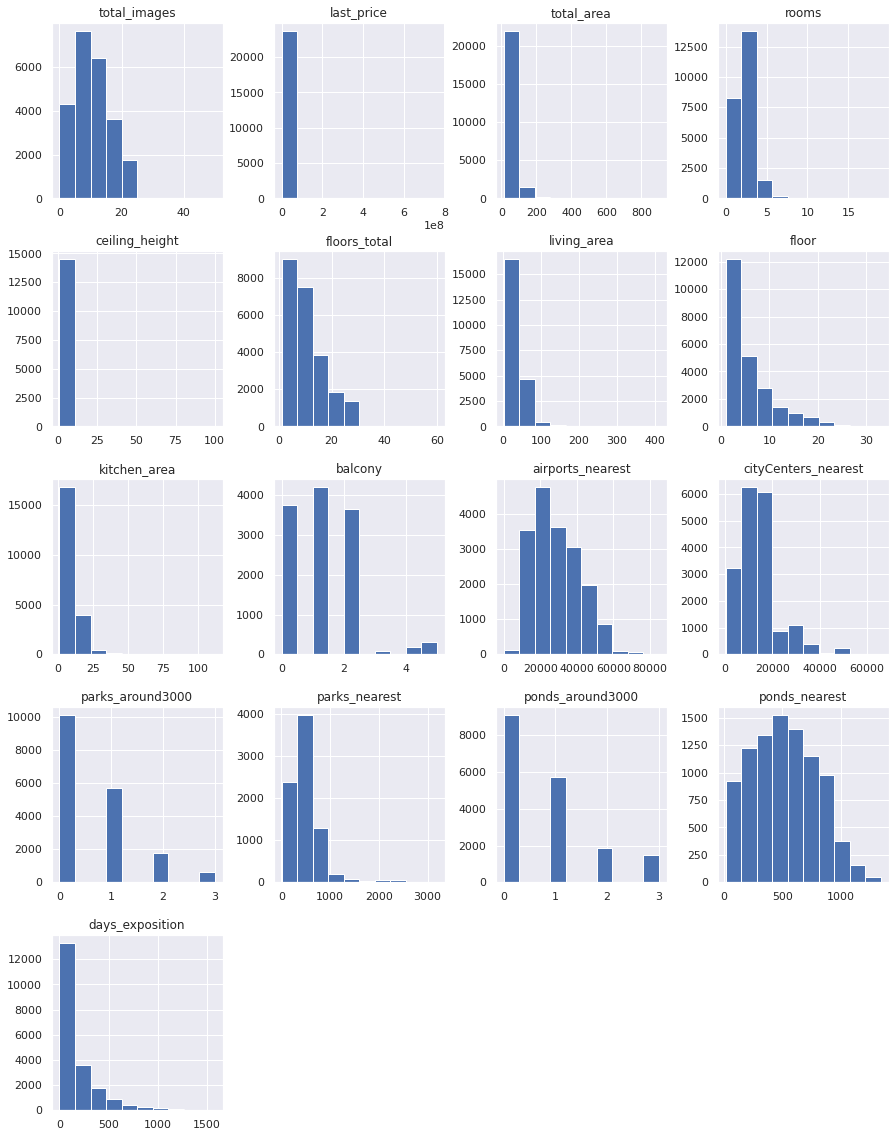

In [3]:
df.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-block alert-info">
Спасибо за совет, переделал)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-block alert-info">

- Присутсвуют незаполненные значения в столбцах: total_images, last_price, total_area, rooms, floor, studio, open_plan, living_area.
- Есть несоответствия в типах данных, например столбцы 'first_day_exposition', 'balcony'
- Большое кол-во пропусков в столбце 'balcony'
- Аномальные значения, например в столбце 'ceiling_height'
   


<div class="alert alert-block alert-info">
    <b> Из анализа полученных данных можно выделить несколько наблюдений:</b>

- Всего в файле с данными - 23 669 строк.
- Полностью заполнены данными столбцы total_images, last_price, total_area, rooms, floor, studio, open_plan, living_area. - Таким образом в данных столбцах отсутствуют пропуски данных.
- В столбцах floors_total и locality_name заполнены данными более 98% строк, т.о. пропуски далее можно будет удалить в связи с малочисленностью.
- В столбце balcony (балконы) пропусков - 11 519, скорее всего это означает что в квартире нет балкона и пропуски можно заменить на 0.
- В столбцах таблицы соблюдается корректность типов данных.
- У некоторых числовых полей есть тип данных float (например, ceiling_height) - т.к. в столбцах есть пропуски (NaN) и pandas такие столбцы автоматически назначает float, с ними можно выполнять математические операции, например вычислить среднее значение.
- В некоторых столбцах тип данных - int64 (например, rooms), который не нужно преобразовывать.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

<div class="alert alert-block alert-info">
Покажи плиз

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 
    
    def show_info(df_name):
        print(df_name.info)
        print('----------')
        display(df_name.head(10))
</div>

### Предобработка данных

In [4]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
display(df['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

В столбце "balcony" в некоторых строках не указано число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Кроме того, преобразуем столбец к целочисленному типу данных (int).

In [5]:
df = df.dropna(subset=['floors_total'])

Удалим 86 строк, в которых не заполнено количество этажей.

In [6]:
median_replace = df.groupby('floors_total')['ceiling_height'].median()
for total in df['floors_total'].unique():
    df.loc[(df['floors_total'] == total) & (df['ceiling_height'].isna()), 'ceiling_height'] = median_replace[total]

df.loc[df['ceiling_height'] > 10,'ceiling_height'] = None
df = df.dropna(subset=['ceiling_height'])
print(df['ceiling_height'][df['ceiling_height'] > 10].count())
# df.info()
# display(df['ceiling_height'].unique())

0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай изучим аномалии в других столбцах. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне. Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

In [7]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Обнаружено значение 0 в кол-ве комнат, остальные значения допустимы (хотя 19 комнат тоже выглядит странно, наверное в этой квартире есть аква-дискотека), все-таки для частоты эксперимента отфильтруем максимальное значение до 10 комнат

In [8]:
# Заменим 0 на 1 в столбце 'rooms'
df['rooms'] = df['rooms'].replace(0, 1)
# Проверка данных по столбцу
df['rooms'].describe()

count    23586.000000
mean         2.079496
std          1.066576
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [9]:
df['total_area'].describe()

count    23586.000000
mean        60.346758
std         35.661784
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Самая большая квартира имеет S = 900 м², в тоже время самая маленькая всего лишь 12 м². Давайте остановимся на более реальных цифрах в пределах от 30 до 600 м²

In [10]:
df['last_price'].describe()

count    2.358600e+04
mean     6.542156e+06
std      1.090742e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная стоймость 430.000 ₽, на мой взгляд такая цена парадоксальна мала, лучше округлим эту сумму до 500.000 ₽. Максимальная стоймость равняется 76.000.000 ₽ (думаю смогу себе позволить такую, как стану аналитиком данных), считаю в этом случае цена может быть реальной.

In [11]:
df = df.query('last_price > 500000 & rooms <= 10 & (total_area > 30 | total_area < 600)')

Применим все необходимые фильтры в нашей выборке

In [12]:
for column in df.columns:
    if column in ['ceiling_height', 'living_area', 'kitchen_area']:
        df[column] = df[column].fillna(value=df[column].median())
    elif column in ['is_apartment', 'balcony', 'airports_nearest',
                    'parks_around_3000', 'ponds_around_3000',
                    'parks_nearest', 'ponds_nearest','days_exposition']:
        df[column] = df[column].fillna(value=0)
    elif column == 'floors_total':
        df[column] = df[column].where(~df[column].isna(), df['floor'])


Далее исключим строки с высотой потолков более 10 м, как вероятные ошибки данных.

In [13]:
median_replace_kitchen = df.groupby('rooms')['kitchen_area'].median()
for total in df['rooms'].unique():
    df.loc[(df['rooms'] == total) & (df['kitchen_area'].isna()), 'kitchen_area'] = median_replace_kitchen[total]
# display(df['kitchen_area'].value_counts())

df.loc[df['kitchen_area'] == '  nan','kitchen_area'] = None
df = df.dropna(subset=['kitchen_area'])
# display(df['kitchen_area'].unique())

Исключим 193 строки с записью "  nan", как вероятные ошибки данных.

In [14]:
median_replace_rooms = df.groupby('rooms')['living_area'].median()
for total in df['rooms'].unique():
    df.loc[(df['rooms'] == total) & (df['living_area'].isna()), 'living_area'] = median_replace_rooms[total]

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

Пропуски в столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms".

In [15]:
df['floors_total'] = df['floors_total'].astype(int)
# display(df['floors_total'].value_counts())

Преобразуем столбец к целочисленному типу данных (int).

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)
# display(df['is_apartment'].value_counts())

В столбце "is_apartment" в некоторых строках есть пропуски, заменим такие пропуски на False.

In [17]:
df = df.dropna(subset=['locality_name'])

Исключим пропуски в столбце "locality_name".

<div class="alert alert-block alert-info">
    
Подведем итоги предобработки данных:

В первоначальном файле было 23 699 строк, в результате обработки и удаления вероятных ошибок данных осталось в датасете 23 345 строк, по которым заполнены все строки во всех значимых столбцах. В процессе обработки данных произведено следующее:

- В столбце "balcony" пропуски были заменены на 0, также столбец преобразован к целочисленному типу данных.
- Пропуски в столбце "ceiling_height" заменили на медианы значений высот потолков по каждому этажу.
- Пропуски в столбце "kitchen_area" заменили на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms".
- Пропуски в столбце "living_area" заменили на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms".
- В столбце "is_apartment" пропуски заменили на False.
- Исключили пропуски в столбце "locality_name", как вероятные ошибки. Значения в остальных столбцах предлагаю не обрабатывать как менее значимые для проведения данного исследования.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Не выполнено задание 2.3
</div>

<div class="alert alert-block alert-info">
    
Точно! Забыл... -_- 
Готово!

In [18]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [19]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','городской поселок')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Супер! Здесь всё верно)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
df['price_area'] = df['last_price'] / df['total_area']

Посчитаем и добавим в столбец "price_area" цену квадратного метра.

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Столбец "first_day_exposition" приведем к удобному виду, оставим только год, месяц, день.

In [22]:
df['day_weekday'] = df['first_day_exposition'].dt.weekday # День
df['day_month'] = df['first_day_exposition'].dt.month     # Месяц
df['day_year'] = df['first_day_exposition'].dt.year       # Год
# df.head()

In [23]:
def floor_category(row):
    if row['floor'] == 1:
        category = 'Первый'
    elif (row['floor'] != 1) & (row['floor'] == row['floors_total']):
        category = 'Последний'
    else:
        category = 'Другой'
    return category

In [24]:
df['floor_category'] = df.apply(floor_category, axis=1)

Добавим в таблицу варианты этажа квартиры (первый, последний, другой).

In [25]:
df['living_total'] = df['living_area'] / df['total_area']

Также добавим в таблицу столбец "living_total" соотношение жилой и общей площади.

In [26]:
df['kitchen_total'] = df['kitchen_area'] / df['total_area']

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>А зачем ты добавляешь эти столбцы? Ты же не взял эту часть из интернета?)))
</div>

<div class="alert alert-block alert-info">
Этот проект оказался выше моих сил, поэтому наша КОГОРТА синтезирует коды, как единый организм))

P.S. Аве Цезарь!

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Нуууууууу ладно) Поверю
</div>

<div class="alert alert-block alert-info">
не ну Гитхаб тож смотрел конечн)))

Кроме того, добавим в таблицу столбец "kitchen_total" отношение площади кухни к общей.

<div class="alert alert-block alert-info">
В данном разделе посчитали и добавили в исходную таблицу следующие столбцы:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- варианты этажности квартиры — первый, последний, другой;
- соотношение жилой и общей площади;
- отношение площади кухни к общей.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут нужна отдельная колонка для расстояния до центра в километрах
</div>

<div class="alert alert-block alert-info">
    
Столбец построен!

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [27]:
df['cityCenters_nearest_interval'] = (df['cityCenters_nearest']/1000).round() # как же сложно придумывать имена переменным
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_weekday,day_month,day_year,floor_category,living_total,kitchen_total,cityCenters_nearest_interval
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,Другой,0.472222,0.231481,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,0,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,0,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30.00,9,0,False,False,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.188679,0.057233,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,0,False,False,9.10,0,городской поселок Янино-1,0.0,NaN,NaN,0.0,NaN,0.0,55.0,95065.789474,0,9,2018,Другой,0.473684,0.299342,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,0,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,3,11,2017,Другой,0.284182,0.386059,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,30.00,22,0,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,0.0,110544.692737,3,4,2019,Другой,0.418994,0.263966,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,0,False,False,8.81,0,поселок Мурино,0.0,NaN,NaN,0.0,NaN,0.0,189.0,87454.764777,2,5,2018,Другой,0.465320,0.265682,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,88524.590164,6,2,2017,Другой,0.714754,0.106557,15.0


### Проведите исследовательский анализ данных

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Прочитай внимательно бриф (задание к проекту) и выполни все задание по нему в той же последовательности, которая там указано. Проверь чтобы были выполнены все пункты, построены все графики и написаны выводы после каждого раздела. Также выдели каждый раздел заголовком, чтобы в проекте соблюдалась структура
</div>

<div class="alert alert-block alert-info">
Готово!

<b>Общая площадь</b>

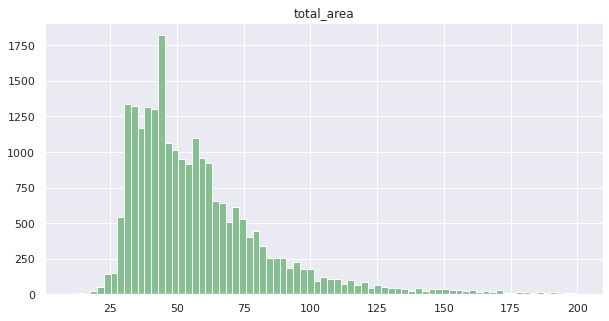

count    23512.000000
mean        60.230038
std         34.907338
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64


In [28]:
df.hist('total_area', bins=75, figsize = (10,5), range=(10,200), color='#86bf91')
plt.show()
print(df['total_area'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца площади квартиры.
Большой пик приходится на площадь от 25 до 50 квадратных метров. Наблюдается тенденция: чем больше площадь, тем меньше реже такие квартиры встречаются, что кажется вполне логичным.

<b>Жилая площадь</b>

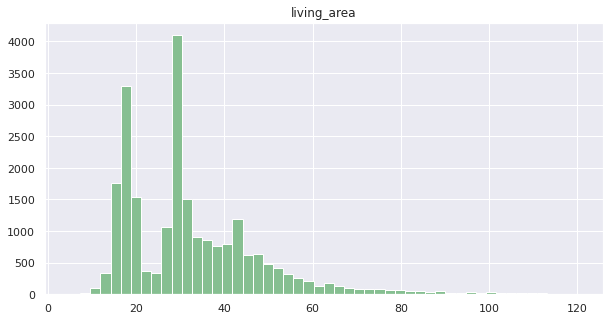

count    23512.000000
mean        34.040436
std         20.770283
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        347.500000
Name: living_area, dtype: float64


In [29]:
df.hist('living_area', bins=50, figsize = (10,5), range=(5,120), color='#86bf91')
plt.show()
print(df['living_area'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца жилая площадь. Большинство квартир имеют жилую площадь около 20 и 35 м²

<b>Площадь кухни</b>

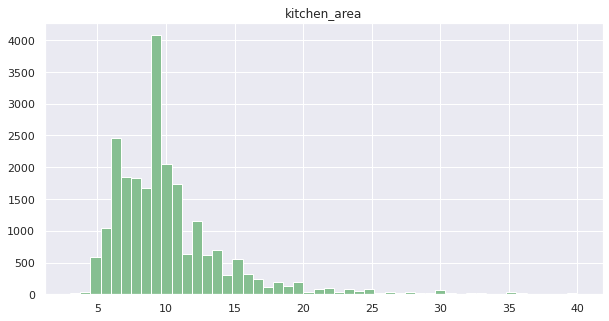

count    23512.000000
mean        10.414167
std          5.560843
min          1.300000
25%          7.300000
50%          9.100000
75%         11.402500
max        107.000000
Name: kitchen_area, dtype: float64


In [30]:
df.hist('kitchen_area', bins=50, figsize = (10,5), range=(3,40), color='#86bf91')
plt.show()
print(df['kitchen_area'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца площадь кухни. Большинство квартир имеют площадь кухни около 10 м²

<b>Цена</b>

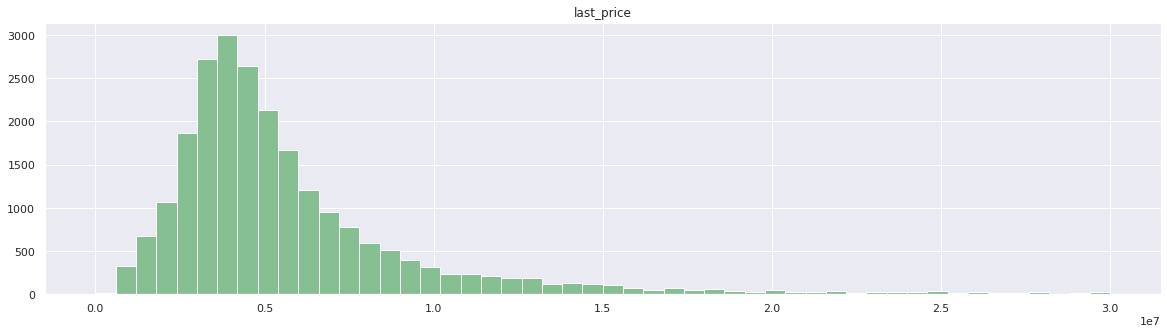

count    2.351200e+04
mean     6.520915e+06
std      1.057076e+07
min      5.200000e+05
25%      3.414500e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [31]:
df.hist('last_price', bins=50, figsize = (20,5), range=(0,30000000), color='#86bf91')
plt.show()
print(df['last_price'].describe())

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-block alert-info">
Гистограмма для столбца цены. Чаще всего продаются квартиры за 3-4 миллиона ₽ 

<b>Количество комнат</b>

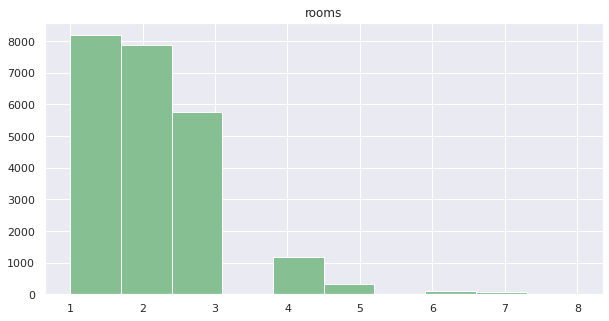

count    23512.000000
mean         2.075493
std          1.043134
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64


In [32]:
df.hist('rooms', bins = df['rooms'].max(), figsize = (10,5), range=(1,8), color='#86bf91')
plt.show()
print(df['rooms'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца количество комнат. Чаще всего встречаются квартиры с 1, 2 и 3 комнатами.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Для данного графика можно применить небольшую хитрость: количество корзин = максимальному числу комнат

	bins = data['rooms'].max()
</div>

<div class="alert alert-block alert-info">
хитрости такие хитрости)

<b>Высота потолков</b>

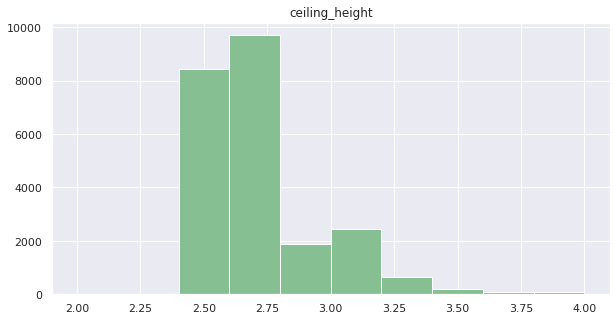

count    23512.000000
mean         2.708320
std          0.245734
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


In [33]:
df.hist('ceiling_height', bins=10, figsize = (10,5), range=(2,4), color='#86bf91')
plt.show()
print(df['ceiling_height'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца высота потолка. Большинство квартир имеет высоту полотка чуть больше 2,5 метров.

<b>Этажи</b>

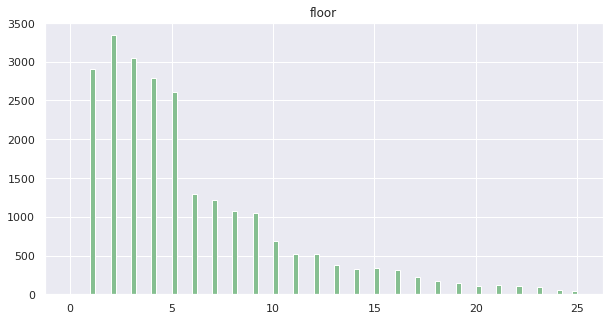

count    23512.000000
mean         5.877722
std          4.864291
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [34]:
df.hist('floor', bins=100, figsize = (10,5), range=(0,25), color='#86bf91')
plt.show()
print(df['floor'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца этажи. Большинство квартир продается в 5 этажных домах.

<b>Общее кол-во этажей в доме</b>

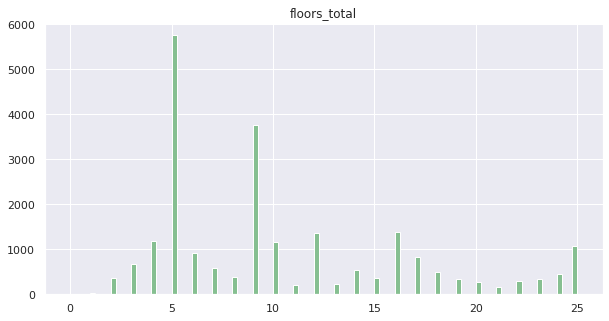

count    23512.000000
mean        10.680674
std          6.587942
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [35]:
df.hist('floors_total', bins=100, figsize = (10,5), range=(0,25), color='#86bf91')
plt.show()
print(df['floors_total'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца количества этажей. Больше всего объявлений приходится на дома в которых 5 и 9 этажей.

<b>Расстояние от центра города</b>

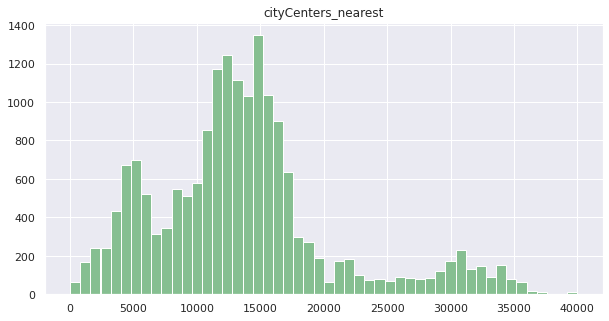

count    18037.000000
mean     14197.085934
std       8611.165678
min        181.000000
25%       9241.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [36]:
df.hist('cityCenters_nearest', bins=50, figsize = (10,5), range=(0,40000), color='#86bf91')
plt.show()
print(df['cityCenters_nearest'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца удаленность от центра города. Как можно заметить большинство квартир продается в диапозоне от 10 до 15 км.

<b>Расстояние от аэропорта</b>

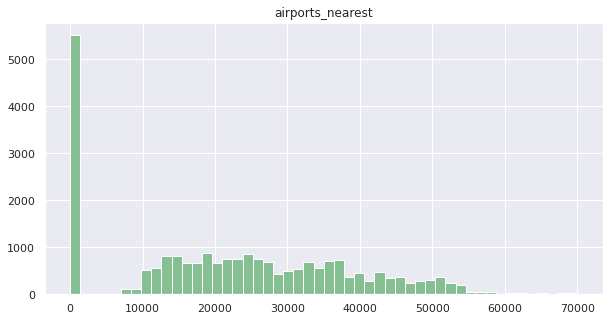

count    23512.000000
mean     22065.486858
std      16458.647165
min          0.000000
25%      10243.000000
50%      21860.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [37]:
df.hist('airports_nearest', bins=50, figsize = (10,5), range=(0,70000), color='#86bf91')
plt.show()
print(df['airports_nearest'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца удаленность от аэропорта. Здесь можно разделить квартиры на 3 диапозона по удаленности от аэропорта: 12-25 км / 30-37 км / 40-50 км

<b>Расстояние от парка</b>

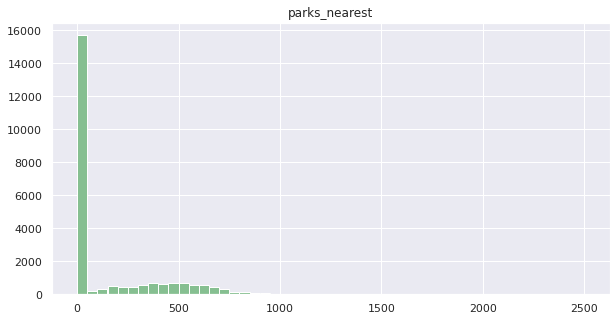

count    23512.000000
mean       167.237964
std        306.393671
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


In [38]:
df.hist('parks_nearest', bins=50, figsize = (10,5), range=(0,2500), color='#86bf91')
plt.show()
print(df['parks_nearest'].describe())

<div class="alert alert-block alert-info">
Гистограмма для столбца расстояние до ближайшего парка. Северная столица богата на парковые зоны, поэтому от большинства квартир зеленые насаждения находятся в пешей доступности.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут необходимо изучить день и месяц отдельно. Мы как раз создали столбцы для них в предыдущем шаге
</div>

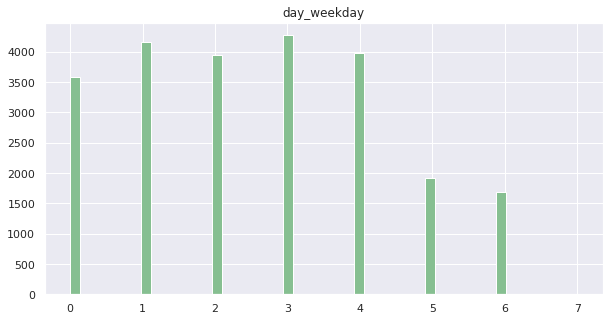

In [39]:
df.hist('day_weekday', bins=50, figsize = (10,5), range=(0,7), color='#86bf91')
plt.show()

<div class="alert alert-block alert-info">
Гистограмма для столбца дня недели. Как можем заметить в выходные дни люди предпочитают отдыхать.

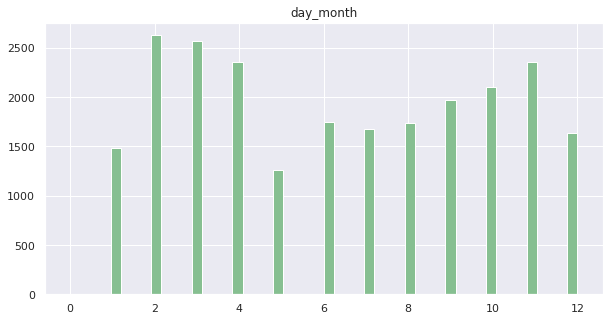

In [40]:
df.hist('day_month', bins=50, figsize = (10,5), range=(0,12), color='#86bf91')
plt.show()

<div class="alert alert-block alert-info">
Гистограмма для столбца месяца. Весна и осень - пик продаж квартир.

<b>Дата публикации</b>

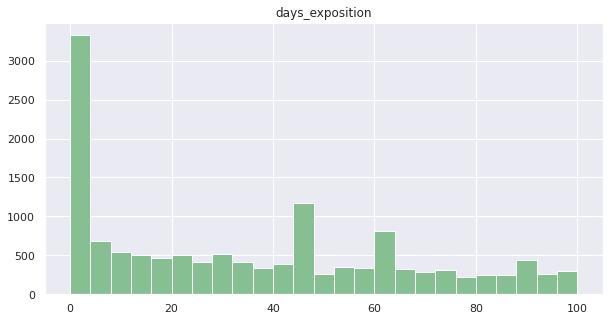

count    23512.000000
mean       156.414639
std        213.412757
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64
73.0


In [41]:
df.hist('days_exposition', bins=25, figsize = (10,5), range=(0,100), color='#86bf91')
plt.show()
print(df['days_exposition'].describe())
print(df['days_exposition'].median())

<div class="alert alert-block alert-info">
Гистограмма для столбца даты публикации. Подавляющие большинство объявлений было выложено около 6 недель назад.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

In [42]:
print(df['ceiling_height'][df['ceiling_height'] < 2].count())
df.loc[df['ceiling_height'] < 2,'ceiling_height'] = None
df = df.dropna(subset=['ceiling_height'])
print(df['ceiling_height'][df['ceiling_height'] < 2].count())

3
0


Удалим квартиры с высотой потолка менее 2м., их оказалось - 3.

In [43]:
df['last_price'][df['last_price'] < 100000].count()
df.loc[df['last_price'] < 100000,'last_price'] = None
df = df.dropna(subset=['last_price'])
df['last_price'][df['last_price'] < 100000].count() # проверка после удаления

0

Также исключим значения с наименьшей ценой квартиры. Всего одна квартира с ценой менее 100000 рублей, ее цена - 12 190 руб.

In [44]:
print(df.corr()[['last_price', 'price_area']])

                              last_price  price_area
total_images                    0.108845    0.133935
last_price                      1.000000    0.751392
total_area                      0.643671    0.303093
rooms                           0.361054    0.055835
ceiling_height                  0.293118    0.294619
floors_total                   -0.010510    0.147571
living_area                     0.532261    0.213373
floor                           0.021362    0.128148
studio                         -0.025780    0.015534
open_plan                      -0.008799    0.008019
kitchen_area                    0.426606    0.362488
balcony                         0.009923    0.021496
airports_nearest                0.110198    0.274291
cityCenters_nearest            -0.211222   -0.318422
parks_around3000                0.158100    0.186197
parks_nearest                   0.121227    0.216195
ponds_around3000                0.163685    0.190960
ponds_nearest                   0.092090    0.

Построим коэффициент корреляции.

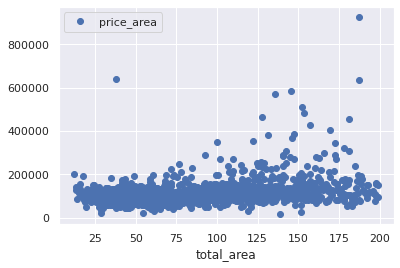

In [45]:
df.query('total_area<200').pivot_table(index='total_area', values='price_area', aggfunc='median').plot(style='o');

Оценим зависимость цены м2 от площади квартиры.

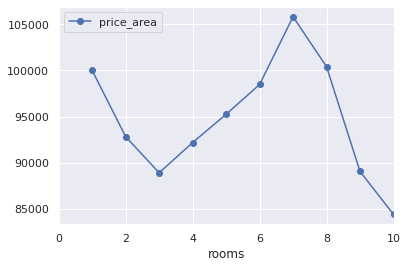

In [46]:
df.query('last_price<80000000').pivot_table(index='rooms', values='price_area', aggfunc='median').plot(style='o-', xlim=(0,10));

Оценим зависимость цены м2 от числа комнат.

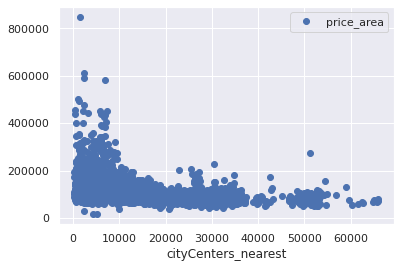

In [47]:
df.query('last_price<100000000').pivot_table(index='cityCenters_nearest', values='price_area', aggfunc='median').plot(style='o');

Оценим зависимость цены м2 от удаленности от центра.

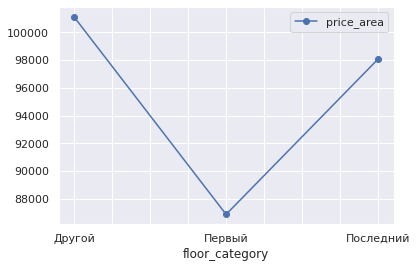

In [48]:
df.query('5<floors_total<25').pivot_table(index='floor_category', values='price_area', aggfunc='median').plot(style='o-');

Оценим зависимость цены м2 от того, на каком этаже расположена квартира.

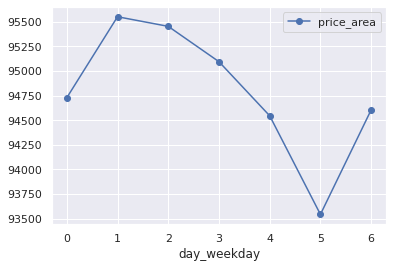

In [49]:
df.query('last_price<100000000').pivot_table(index='day_weekday', values='price_area', aggfunc='median').plot(style='o-');

Оценим зависимость цены м2 от дня размещения объявления.

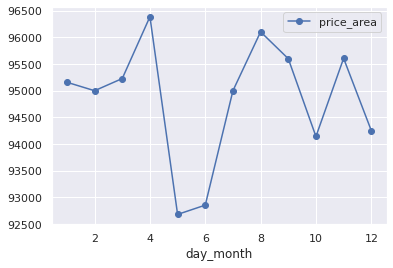

In [50]:
df.query('last_price<100000000').pivot_table(index='day_month', values='price_area', aggfunc='median').plot(style='o-');

Оценим зависимость цены м2 от месяца размещения объявления.

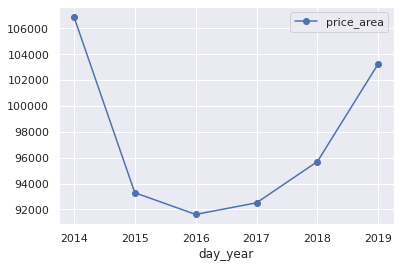

In [51]:
df.query('last_price<100000000').pivot_table(index='day_year', values='price_area', aggfunc='median').plot(style='o-');

Оценим зависимость цены м2 от года размещения объявления.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Не хватает изучения столбца с жилой площадью и площадью кухни
</div>

<div class="alert alert-block alert-info">
Готово!

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

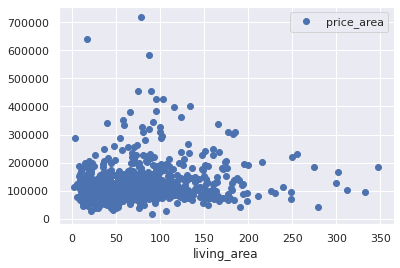

In [52]:
df.query('last_price<100000000').pivot_table(index='living_area', values='price_area', aggfunc='median').plot(style='o');

Оценим зависимость цены м2 от жилой площади.

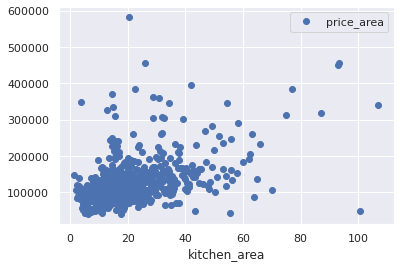

In [53]:
df.query('last_price<100000000').pivot_table(index='kitchen_area', values='price_area', aggfunc='median').plot(style='o');

Оценим зависимость цены м2 от площади кухни.

In [54]:
locality=df['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(locality)

Санкт-Петербург      15623
поселок Мурино         550
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Выберем 10 населённых пунктов с наибольшим числом объявлений.

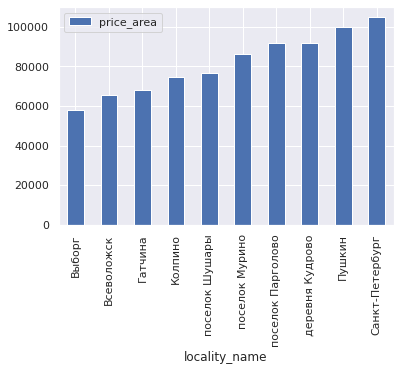

In [55]:
df.query('locality_name in @locality.index').pivot_table(index='locality_name', values='price_area', aggfunc='median').sort_values('price_area').plot(kind='bar');

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно! Как вариант, тут вместо таблицы можно построить гистограмму, так будет более наглядно)
</div>

Посчитаем среднюю цену м2 в этих населённых пунктах, выделим пункты с самой высокой и низкой стоимостью жилья.

In [56]:
df['cityCenters'] = (df['cityCenters_nearest']/1000).dropna().astype(int)
# df.head(10)

Создадим в таблице столбец с расстоянием до центра в километрах, округлим его до целых значений.

In [57]:
df['price_km'] = df['last_price'] / df['cityCenters'].dropna().astype(int)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_weekday,day_month,day_year,floor_category,living_total,kitchen_total,cityCenters_nearest_interval,cityCenters,price_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,Другой,0.472222,0.231481,16.0,16.0,8.125000e+05
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,0,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277,19.0,18.0,1.861111e+05
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,0,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214,14.0,13.0,3.996923e+05
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,30.00,9,0,False,False,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.188679,0.057233,7.0,6.0,1.081667e+07
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,8.0,8.0,1.250000e+06
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,0,False,False,9.10,0,городской поселок Янино-1,0.0,NaN,NaN,0.0,NaN,0.0,55.0,95065.789474,0,9,2018,Другой,0.473684,0.299342,NaN,NaN,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,0,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,3,11,2017,Другой,0.284182,0.386059,19.0,19.0,1.947368e+05
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,30.00,22,0,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,0.0,110544.692737,3,4,2019,Другой,0.418994,0.263966,12.0,11.0,7.195455e+05
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,0,False,False,8.81,0,поселок Мурино,0.0,NaN,NaN,0.0,NaN,0.0,189.0,87454.764777,2,5,2018,Другой,0.465320,0.265682,NaN,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,88524.590164,6,2,2017,Другой,0.714754,0.106557,15.0,15.0,3.600000e+05


Посчитаем среднюю цену для каждого километра.

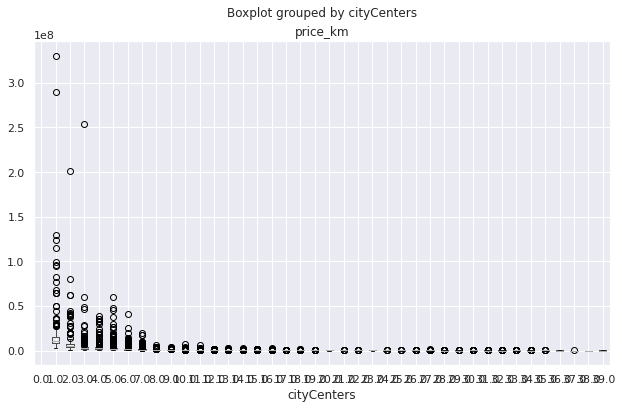

In [60]:
import warnings
warnings.filterwarnings("ignore")
df.query('cityCenters<40').boxplot('price_km', by='cityCenters', figsize=(10,6));

Построим график зависимости средней цену километра от удалённости от центра.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


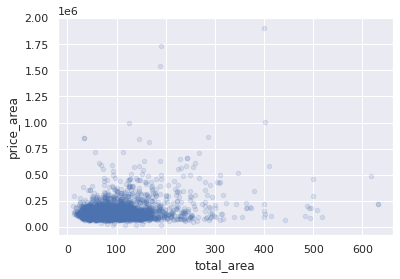

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count    23509.000000
mean        60.231862
std         34.909115
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64


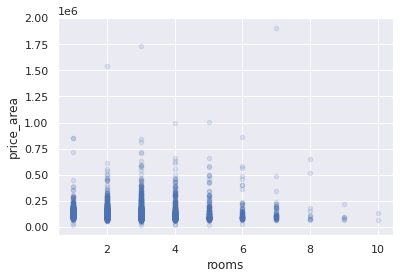

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count    23509.000000
mean         2.075546
std          1.043177
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64


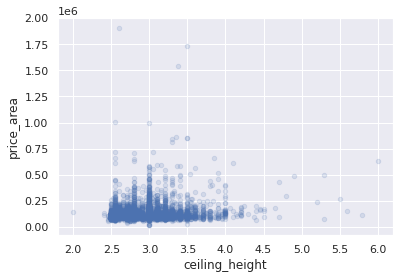

count    23509.000000
mean         2.708497
std          0.245220
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


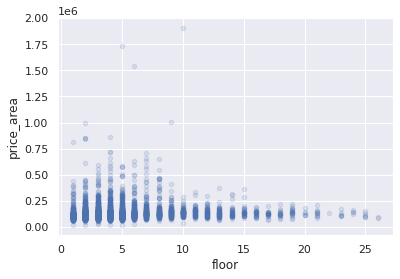

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count    23509.000000
mean         5.877919
std          4.864488
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


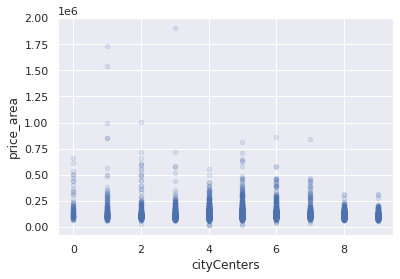

count    18035.000000
mean        13.700194
std          8.614802
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: cityCenters, dtype: float64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


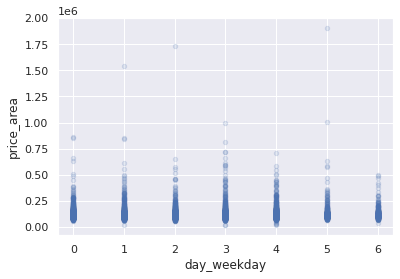

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count    23509.000000
mean         2.567740
std          1.788162
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_weekday, dtype: float64


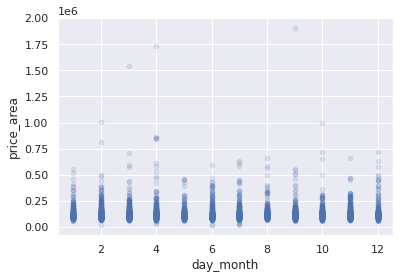

count    23509.000000
mean         6.403207
std          3.492980
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: day_month, dtype: float64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


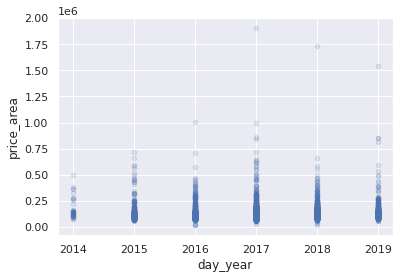

count    23509.000000
mean      2017.370284
std          1.037367
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: day_year, dtype: float64


In [59]:
for column in ['total_area', 'rooms', 'ceiling_height', 'floor', 'cityCenters', 'day_weekday', 'day_month', 'day_year']:
    df.query('cityCenters<10').plot(x=column, y='price_area', kind='scatter', alpha=0.15)
    plt.show()
    print(df[column].describe())

Построим графики и вызовем таблицу describe для каждого параметра.

<div class="alert alert-block alert-info">
Выводы по данной категории:

Подтверждается незначительное соответствие, чем больше площадь квартиры, тем меньше цена квадратного метра и квартиры в целом. Средняя площадь квартиры - 60м2.
Цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость м2 снижается.
Высота потолков является одним из основных факторов цены: высота от 2.7 до 3 м сильно влияет на цену, квартиры с высотой менее 2,7м стоят значительно ниже.
Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Средняя расстояние до центра - 13,7 км.
Стоимость м2 постепенно расте до 7-8 этажа, после стоимость м2 снижается. Квартиры на первом и последнем этаже дешевле чем на других этажах. Также на первом этаже цена существенно ниже чем на последнем.
Наибольшее значение цены м2 у объявлений, выставленных в середине недели, наименьшая - у объявлений выставленных в конце недели.
Высокие цены у квартир, выставленных в апреле, августе и декабре, наименьшая - в мае
Средняя цена растет с 2014 до 2017г

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

<div class="alert alert-block alert-info">

Проведя исследовательскую работу по объявлениям о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:

- Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Средняя расстояние до центра - 13,7 км.
- Высота потолков является одним из самых сильным фактором цены: высота от 2.7 до 3.0 прямо влияет на цену кв. метра. При высоте потолков ниже 2.7м цена кв. метра значительно уменьшается.
- Первые и последние этажи во всех домах в среднем дешевле остальных этажей. Кроме того, цена квартиры на первом этаже существенно ниже чем на последнем.
- При прочих равных цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость кв. метра снижается.
В целом можно выделить незначительное соответствие, чем больше площадь квартиры, тем меньше цена кв. метра и квартиры в целом. Средняя площадь квартиры - 60м2.
- Стоимость кв. метра постепенно растет до 7-8 этажа, после чего стоимость кв. метра снижается.
- Парки и водоемы поблизости незначительно увеличивают стоимость кв. метра.
- Самые высокие цены на квартиры, выставленных в апреле и августе, наименьшая - у объявлений выставленных в мае и июне.
- Наибольшая средняя цена квартир выставленных на продажу в начале недели (понедельник, вторниа), наименьшая - у объявлений выставленных в конце недели (суббота, воскресенье). Средняя цена кв. метра растет до 2014, снижается до 2017г, а затем постепенно увеличивается до 2019г.
- Обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев. Среднее время продажи - 181 день.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-block alert-info">
Готово!

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- выполнить задание 2.3
<br>- сделать отдельную колонку с расстоянием до центра в километрах
<br>- внести вне необходимые правки в шаг 4
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались две правки:
<br>- изучить столбец с жилой площадью и площадью кухни
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод